In [9]:
import pandas as pd

df = pd.read_csv("results/baseline_metrics.csv")

df.head(10)

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,train_size
0,0.690437,0.5850,0.793103,0.230,0.356589,0.6194,645.747,80.718,3.0,25
1,0.687244,0.5850,0.596591,0.525,0.558511,0.6200,645.120,80.640,3.0,50
2,0.683032,0.6300,0.609244,0.725,0.662100,0.6202,644.965,80.621,3.0,100
3,0.616024,0.7500,0.700000,0.875,0.777778,0.6238,641.247,80.156,3.0,150
4,0.603249,0.8225,0.824121,0.820,0.822055,0.6184,646.871,80.859,3.0,200
5,0.335057,0.8800,0.883838,0.875,0.879397,0.6198,645.321,80.665,3.0,250
6,0.312773,0.8925,0.910995,0.870,0.890026,0.6228,642.312,80.289,3.0,300
7,0.689587,0.6175,0.631285,0.565,0.596306,0.6167,648.653,81.082,3.0,25
8,0.687244,0.5850,0.596591,0.525,0.558511,0.6201,645.088,80.636,3.0,50
9,0.683032,0.6300,0.609244,0.725,0.662100,0.6241,640.886,80.111,3.0,100


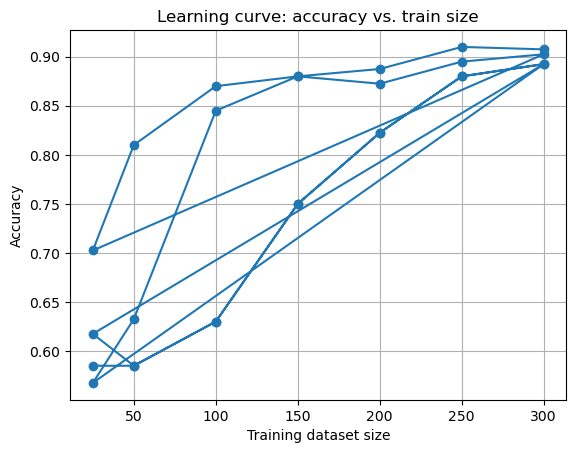

In [7]:
import matplotlib.pyplot as plt

plt.plot(df["train_size"], df["eval_accuracy"], marker="o")
plt.xlabel("Training dataset size")
plt.ylabel("Accuracy")
plt.title("Learning curve: accuracy vs. train size")
plt.grid(True)
plt.show()